In [76]:
#Import libraries, data file and perform some initial transformations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_passengers = pd.read_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Jupyter Files\Assignments\Assignment 2\titanic\train.csv', 
                                 sep = ',',
                                 skiprows = 1,
                                 header = None,
                                 names = ['passenger_id','survived','ticket_class','name','sex','age','num_sibsp','num_parch','ticket_number','fare','cabin_number','embarkation_port'],
                                 index_col = 'passenger_id')
titanic_passengers


,survived,ticket_class,name,sex,age,num_sibsp,num_parch,ticket_number,fare,cabin_number,embarkation_port
passenger_id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [77]:
#Check data type for each column
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          891 non-null    int64  
 1   ticket_class      891 non-null    int64  
 2   name              891 non-null    object 
 3   sex               891 non-null    object 
 4   age               714 non-null    float64
 5   num_sibsp         891 non-null    int64  
 6   num_parch         891 non-null    int64  
 7   ticket_number     891 non-null    object 
 8   fare              891 non-null    float64
 9   cabin_number      204 non-null    object 
 10  embarkation_port  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [78]:
#Check if duplicates exist (in this case there are none)
titanic_passengers.duplicated()

passenger_id
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

In [79]:
#Count the empty (NaN, NAN, na) values in each column
#Need to fix empty values in age column, will not use cabin_number for analysis so will drop column and embarkation_port only has 2 values missing so will drop those NaNs 
titanic_passengers.isna().sum()

survived              0
ticket_class          0
name                  0
sex                   0
age                 177
num_sibsp             0
num_parch             0
ticket_number         0
fare                  0
cabin_number        687
embarkation_port      2
dtype: int64

In [80]:
#Fill empty values in age column with mean, so I can use this column for analysis later on
titanic_passengers['age'].fillna(titanic_passengers['age'].mean())
titanic_passengers['age'] = titanic_passengers['age'].fillna(titanic_passengers['age'].mean())
titanic_passengers

,survived,ticket_class,name,sex,age,num_sibsp,num_parch,ticket_number,fare,cabin_number,embarkation_port
passenger_id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [81]:
#Round age column, could not use normal round function because it will round .5 to the nearest even number, so used this custom code instead
import decimal
titanic_passengers['age']=[(decimal.Decimal(i).quantize(decimal.Decimal(1), rounding=decimal.ROUND_HALF_UP)) for i in titanic_passengers['age']]

In [82]:
#Drop cabin_number (too many empty vals) and ticket_number (not used for analysis) columns
titanic_passengers = titanic_passengers.drop(['cabin_number', 'ticket_number'], axis=1)
#Remove rows with missing embarkation_port values
titanic_passengers = titanic_passengers.dropna(subset = 'embarkation_port')

In [83]:
#Verify transformations in exported file
titanic_passengers.to_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Jupyter Files\Assignments\Assignment 2\titanic\csv_titanic_passengers_out.csv')

In [84]:
#Count the empty (NaN, NAN, na) values in each column (none left)
#Fixed columns age, cabin_number and embarkation_port
titanic_passengers.isna().sum()

survived            0
ticket_class        0
name                0
sex                 0
age                 0
num_sibsp           0
num_parch           0
fare                0
embarkation_port    0
dtype: int64

In [85]:
#Change age data type to integer
titanic_passengers['age'] = titanic_passengers['age'].astype(int)

In [86]:
#Verify new age data type (now changed to integer)
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          889 non-null    int64  
 1   ticket_class      889 non-null    int64  
 2   name              889 non-null    object 
 3   sex               889 non-null    object 
 4   age               889 non-null    int32  
 5   num_sibsp         889 non-null    int64  
 6   num_parch         889 non-null    int64  
 7   fare              889 non-null    float64
 8   embarkation_port  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 66.0+ KB


In [87]:
#Determine min and max age values to create bins
titanic_passengers['age'].agg(['min', 'max'])

min     0
max    80
Name: age, dtype: int64

In [88]:
#Create age bins, child, adult, senior (new feature)
titanic_passengers['age_range'] = pd.cut(titanic_passengers['age'], bins=[0,17,59,80], include_lowest=True, labels=['child','adult','senior'])

In [89]:
#Determine min and max fare values to create bins
titanic_passengers['fare'].agg(['min', 'max'])

min      0.0000
max    512.3292
Name: fare, dtype: float64

In [90]:
#Create fare bins, low, mid, high (new feature)
titanic_passengers['fare_range'] = pd.cut(titanic_passengers['fare'], bins=[0,10,40,513], include_lowest=True, labels=['low','mid','high'])

In [91]:
#Create new family column by adding num_sibsp and num_parch (new feature)
titanic_passengers['family'] = titanic_passengers.num_sibsp + titanic_passengers.num_parch

In [92]:
#Create new lone_passenger column where passenger has no family (new feature)
titanic_passengers['lone_passenger'] = titanic_passengers.family == 0

In [93]:
#Verify transformations in exported file
titanic_passengers.to_csv(r'C:\Users\jessi\OneDrive\Documents\UofT SCS - 3250\Jupyter Files\Assignments\Assignment 2\titanic\csv_titanic_passengers_out.csv')

In [94]:
#Identify how many passengers survived (340)
titanic_passengers['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

<Axes: >

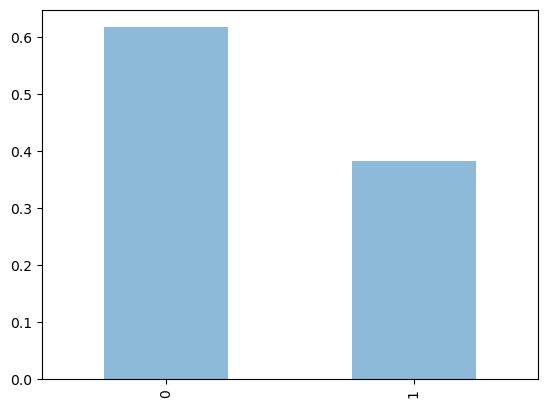

In [95]:
#Visualizing these counts we can see that about 60% of passengers died and 40% survived
titanic_passengers.survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

<Axes: xlabel='embarkation_port', ylabel='count'>

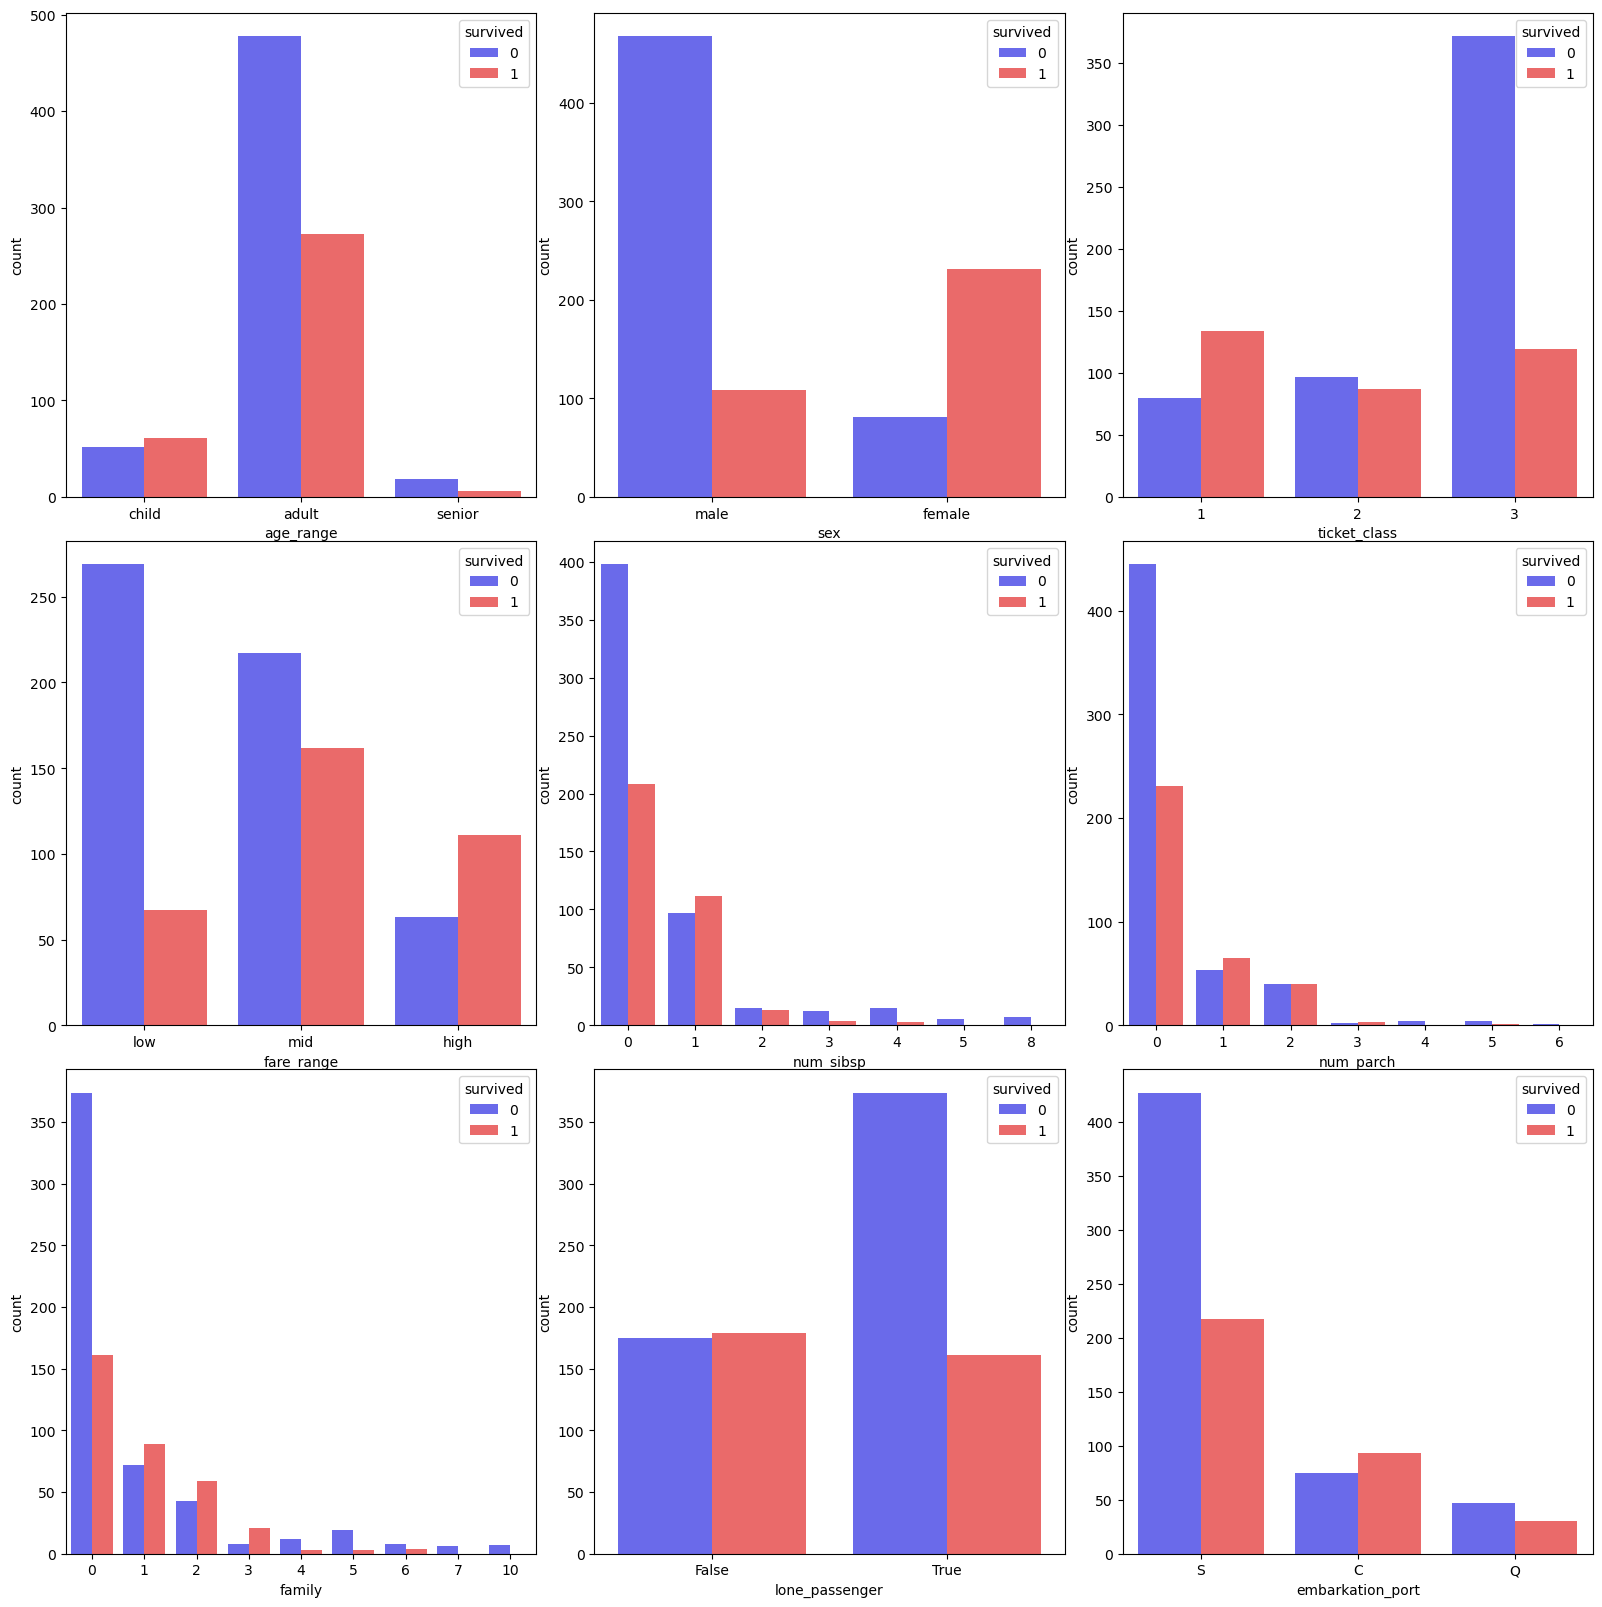

In [96]:
#Visualize count of survivors for existing columns and new columns I created
'''After cleaning and transforming the data in the previous steps and creating some new columns/features, 
I can answer all the questions in this assignment, starting with:

Question 1: What categories of passengers were most likely to survive the Titanic disaster?

Answer:
- age_range: Children were most likely to survive.
- sex: Females were most likely to survive.
- ticket_class: First-class passengers were most likely to survive.
- fare_range: Passengers who paid a high fare were most likely to surive.
- num_sibsp: Passengers with one sibling or spouse were most likely to survive.
- num_parch: Passengers with one to three parents or children were most likely to survive.
- family: Passengers with one to three family members were most likely to survive.
- lone_passenger: Passengers who travelled with family were most likely to survive.
- embarkation_port: Passengers who embarked from Cherbourg were most likely to survive.
In each of these scenarios/charts, the survived red bar is higher than the died blue bar which is how I concluded that 
category of passengers was most likely to survive. In the next few cells I provide some more detailed categories of 
survivors to further answer question 1.

Question 2: What other attributes did you use for the analysis?
Explain how you used them. Provide a complete list of all attributes used.

Answer:
As noted in my answer above, the other attributes I used for my analysis aside from passenger age_range, gender 
and ticket_class are:
- survived
- fare_range
- num_sibsp
- num_parch
- family
- lone_passenger
- embarkation_port

I used these attributes by plotting each of the columns separately to visually see which category within the column 
was more likely to survive compared against the other categories, exactly like what I did with age_range, gender 
and ticket_class.

Here is the complete list of attributes I used:
- survived
- ticket_class
- sex
- age
- age_range
- num_sibsp
- num_parch
- family
- lone_passenger
- fare
- fare_range
- embarkation_port

Question 3: Did you engineer any attributes (created new attributes)? 
If yes, explain the rationale and how the new attributes were used in the analysis?
If you have excluded any attributes from the analysis, provide an explanation of why you believe they can be excluded.

Answer:
The new attributes I engineered/created are:

- age_range: The rationale behind this new feature is I wanted to bin the age values as there were many values ranging from 
0 to 80, which would be challenging to graph in a visually meaningful way. By creating categories (ranges) for the age
values I was able to plot the age_range of child, adult and senior and visually demonstrate which category was more likely 
to survive. I explained in earlier cells how I was able to create this age_range feature.
- fare_range: Similar to my rationale for creating age_range, I wanted to bin the fare values are there were many, ranging
from 0 to 512. I wanted to plot a graph that had ranges of low, mid and high to visually be easier to analyze and producemeaningful 
meaningful insights. I explained in earlier cells how I was able to create this fare_range feature.
- family: The rationale behind this new feature was to aggregate both num_sibsp and num_parch columns to simplify the 
analysis since both are types of family members. I explained in earlier cells how I was able to create this family feature.
- lone_passenger: My rationale behind this new feature was to analyze whether being a lone passenger (no family members 
accompanying the passenger) would affect a passenger's survival rate. It seems the number of lone survivors is relatively 
similar to those having family onboard.

The attributes I exluded from the analysis were cabin_number and ticket_number. The cabin_number column had too many 
empty values to be able to produce meaningful insights. I wasn't able to fill the NaN values with the mean because 
of the data type so I would be working with a few values for the analysis, as such I thought it was best to drop the 
entire column. The ticket_number column could have had arbitrary values which would not add value to the analysis.

Question 4: 
How did you treat missing values? Provide a detailed explanation in the comments.

Answer:
I treated the missing values in the age column by taking the mean of all values in the column and assigning it to the 
missing cells. This ensured I didn't drop/exclude the missing values and I could use the entire column for further analysis. 
The code to determine the mean and assign it to NaN values is shown in an earlier cell. I treated the missing values in the
embarkation_port column by dropping the rows that contained NaN values, I decided to do this as there were only 2 rows
with missing data, and would not affect the overall result. Lastly, I dropped the entire cabin_number column because
most of the column contained empty values and I was not using the column for my analysis anyway.


'''
fig, ax = plt.subplots(3, 3, figsize=(16,16))
plt.tight_layout()

sns.countplot(
    data=titanic_passengers,
    x='age_range',
    hue='survived',
    palette='seismic',
    ax=ax[0,0]
)

sns.countplot(
    data=titanic_passengers,
    x='sex',
    hue='survived',
    palette='seismic',
    ax=ax[0,1]
)

sns.countplot(
    data=titanic_passengers,
    x='ticket_class',
    hue='survived',
    palette='seismic',
    ax=ax[0,2]
)

sns.countplot(
    data=titanic_passengers,
    x='fare_range',
    hue='survived',
    palette='seismic',
    ax=ax[1,0]
)

sns.countplot(
    data=titanic_passengers,
    x='num_sibsp',
    hue='survived',
    palette='seismic',
    ax=ax[1,1]
)

sns.countplot(
    data=titanic_passengers,
    x='num_parch',
    hue='survived',
    palette='seismic',
    ax=ax[1,2]
)

sns.countplot(
    data=titanic_passengers,
    x='family',
    hue='survived',
    palette='seismic',
    ax=ax[2,0]
)

sns.countplot(
    data=titanic_passengers,
    x='lone_passenger',
    hue='survived',
    palette='seismic',
    ax=ax[2,1]
)

sns.countplot(
    data=titanic_passengers,
    x='embarkation_port',
    hue='survived',
    palette='seismic',
    ax=ax[2,2]
)

In [97]:
'''Further answering Question 1: A more specific category of likely survivors are female passengers from first class. They had a survival rate of almost 97% which is the highest in the chart below.
This makes sense because in the previous cell, the sex graph showed females were most likely to survive and the ticket_class graph showed first-class passengers were most likely to survive.'''
titanic_passengers.pivot_table('survived', index='sex', columns='ticket_class')

ticket_class,1,2,3
sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [98]:
'''Further answering Question 1: To be even more specific, the category of female adult lone passengers from first class were most likely to survive. They had a survival rate of almost 97% which is the highest in the chart below.'''
titanic_passengers.pivot_table('survived', ['sex', 'age_range', 'family'], 'ticket_class')

ticket_class                    1         2         3
sex    age_range family                              
female child     0       1.000000  1.000000  0.750000
                 1       1.000000  1.000000  0.666667
                 2            NaN  1.000000  0.666667
                 3       0.500000  1.000000  1.000000
                 4            NaN       NaN  0.000000
                 5            NaN       NaN  0.000000
                 6            NaN       NaN  0.333333
                 7            NaN       NaN  0.000000
       adult     0       0.967742  0.900000  0.588235
                 1       1.000000  0.875000  0.478261
                 2       1.000000  0.900000  0.500000
                 3       0.500000  1.000000  0.666667
                 4       1.000000  1.000000  0.000000
                 5       1.000000  1.000000  0.000000
                 6            NaN       NaN  0.500000
                 7            NaN       NaN  0.000000
                 10           NaN       NaN  0.000000
       senior    0            NaN       NaN  1.000000
                 1       1.000000       NaN       NaN
male   child     0            NaN  0.000000  0.100000
                 1            NaN       NaN  0.750000
                 2       1.000000  1.000000  0.500000
                 3       1.000000  1.000000  1.000000
                 4            NaN       NaN  0.000000
                 5            NaN       NaN  0.000000
                 6            NaN       NaN  0.333333
                 7            NaN       NaN  0.000000
       adult     0       0.369231  0.089552  0.124000
                 1       0.400000  0.066667  0.083333
                 2       0.285714  0.000000  0.235294
                 3       1.000000  0.000000  0.000000
                 4            NaN       NaN  0.000000
                 5       0.000000       NaN  0.000000
                 6            NaN       NaN  0.000000
                 10           NaN       NaN  0.000000
       senior    0       0.100000  0.333333  0.000000
                 1       0.000000       NaN       NaN
                 2       0.500000  0.000000       NaN
                 5       0.000000       NaN       NaN

In [99]:
'''Further answering Question 1: Another specific category of likely survivors are female adult passengers from first class who departed from Southampton. They had a survival rate of almost 98% which is the highest in the chart below.'''
titanic_passengers.pivot_table('survived', ['sex', 'age_range', 'embarkation_port'], 'ticket_class')

ticket_class                              1         2         3
sex    age_range embarkation_port                              
female child     C                 1.000000  1.000000  0.750000
                 Q                      NaN       NaN  1.000000
                 S                 0.833333  1.000000  0.350000
       adult     C                 0.975000  1.000000  0.545455
                 Q                 1.000000  1.000000  0.700000
                 S                 0.975610  0.896552  0.373134
       senior    C                 1.000000       NaN       NaN
                 S                 1.000000       NaN  1.000000
male   child     C                 1.000000  1.000000  0.400000
                 Q                      NaN       NaN  0.000000
                 S                 1.000000  0.800000  0.235294
       adult     C                 0.405405  0.111111  0.210526
                 Q                 0.000000  0.000000  0.090909
                 S                 0.363636  0.072289  0.113537
       senior    C                 0.250000       NaN       NaN
                 Q                      NaN       NaN  0.000000
                 S                 0.100000  0.250000  0.000000

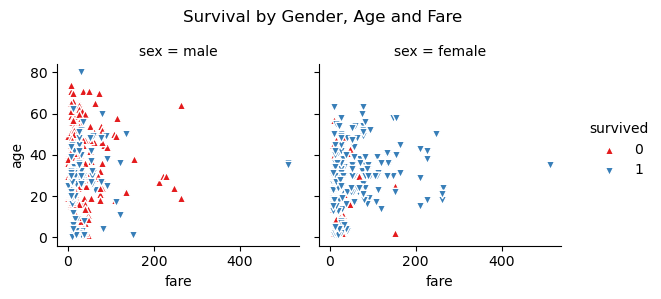

In [100]:
#Graph showing males were more likely to die than females, with the age majority in the 20-50 range
g = sns.FacetGrid(titanic_passengers, hue='survived', col="sex", margin_titles=True,
                palette='Set1',hue_kws=dict(marker=['^', 'v']))
g.map(plt.scatter, 'fare', 'age',edgecolor='w').add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age and Fare');

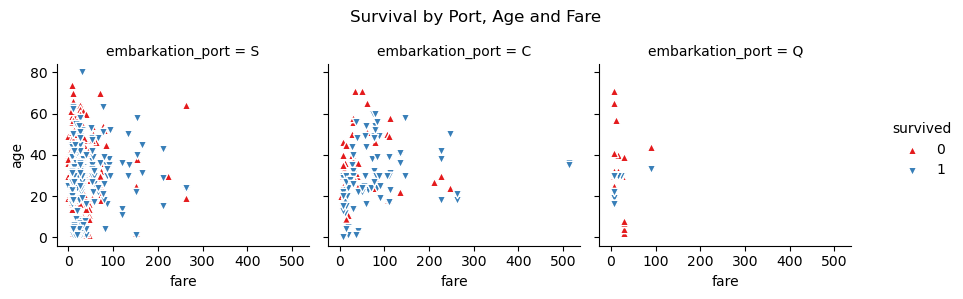

In [101]:
#Graph showing distribution of survival amongst the 3 ports
g = sns.FacetGrid(titanic_passengers, hue='survived', col="embarkation_port", margin_titles=True,
                palette='Set1',hue_kws=dict(marker=['^', 'v']))
g.map(plt.scatter, 'fare', 'age',edgecolor='w').add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Port, Age and Fare');

C:\Users\jessi\AppData\Local\Temp\ipykernel_21892\2625577335.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_passengers.corr(), cmap=colormap, annot=True, linewidths=0.2)


<Axes: >

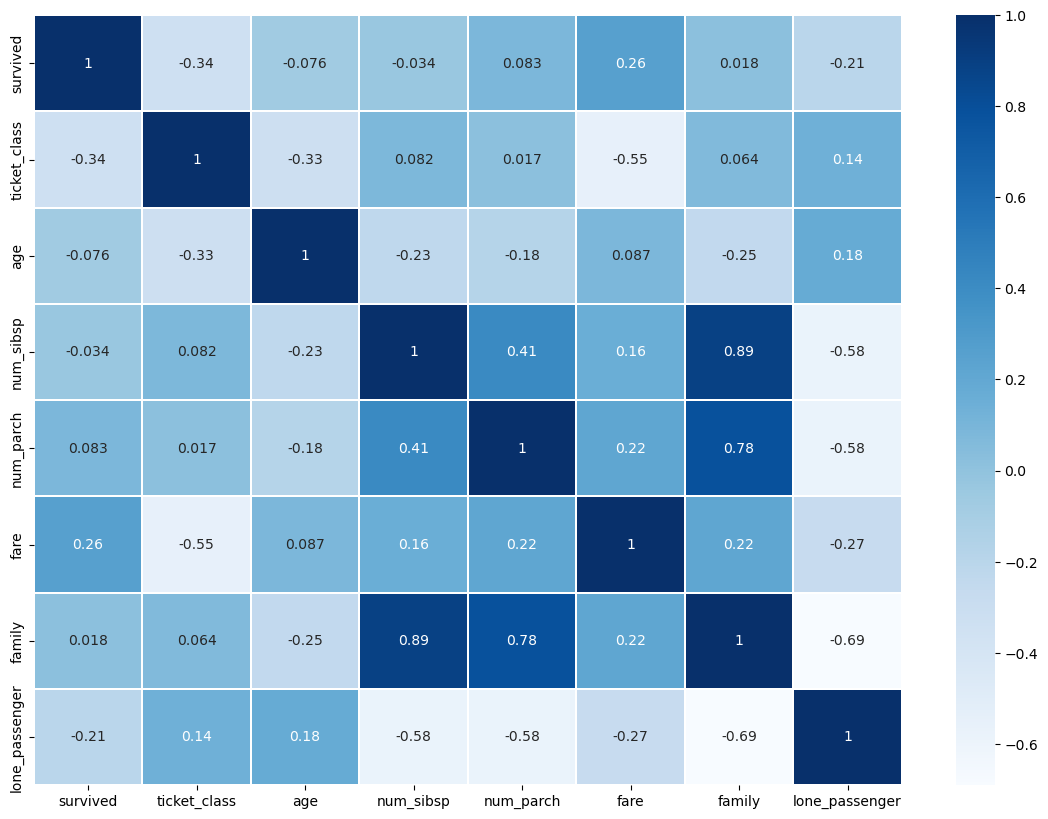

In [102]:
#Correlation heatmap to see if there are other variables to analyze
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic_passengers.corr(), cmap=colormap, annot=True, linewidths=0.2)

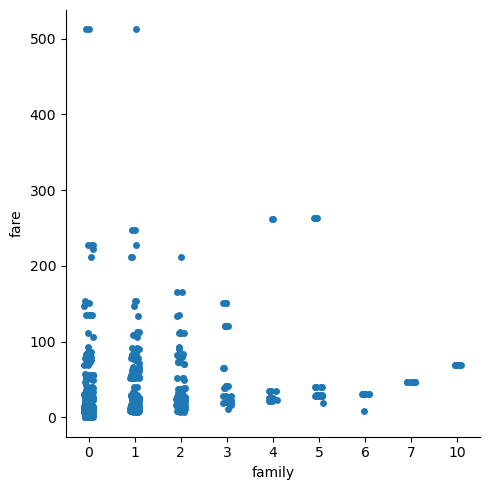

In [103]:
#Postive correlation between fare paid based on number of family members
#The higher the number of family members, the lower the fare paid and vice versa
sns.catplot(x='family', y='fare', data=titanic_passengers)

In [104]:
#i wanted to analyze the subset of survivors
survival_category = titanic_passengers.loc[titanic_passengers['survived'] == 1]
survival_category

,survived,ticket_class,name,sex,age,num_sibsp,num_parch,fare,embarkation_port,age_range,fare_range,family,lone_passenger
passenger_id,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,adult,high,1,False
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,adult,low,0,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,adult,high,1,False
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S,adult,mid,2,False
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C,child,mid,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,7.2250,C,child,low,0,True
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,83.1583,C,adult,high,1,False
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,26.0000,S,adult,mid,1,False


In [105]:
#Most survivors were aged 30 (mean age)
survival_category['age'].value_counts()

30    62
24    15
1     11
35    11
27    11
36    11
22    11
18     9
32     9
19     9
29     8
31     8
4      7
33     7
28     7
17     6
16     6
40     6
26     6
25     6
42     6
48     6
34     6
3      5
50     5
45     5
39     5
21     5
23     5
15     4
5      4
49     4
38     4
52     3
54     3
2      3
20     3
44     3
58     3
14     3
63     2
56     2
8      2
60     2
9      2
13     2
51     2
41     2
6      2
0      1
11     1
43     1
62     1
80     1
53     1
7      1
55     1
12     1
37     1
47     1
Name: age, dtype: int64

<Axes: ylabel='age_range'>

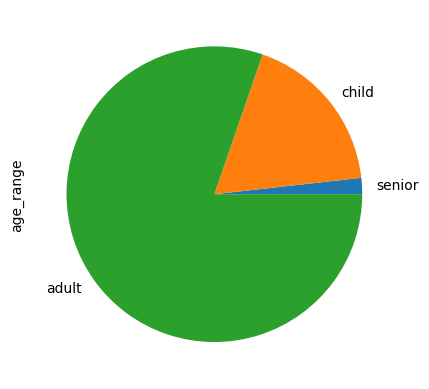

In [106]:
#Most survivors were adults, followed by children then seniors
survival_category['age_range'].value_counts().sort_values().plot(kind='pie')

In [107]:
#Most survivors were female (almost 2/3)
survival_category['sex'].value_counts()

female    231
male      109
Name: sex, dtype: int64

<Axes: ylabel='sex'>

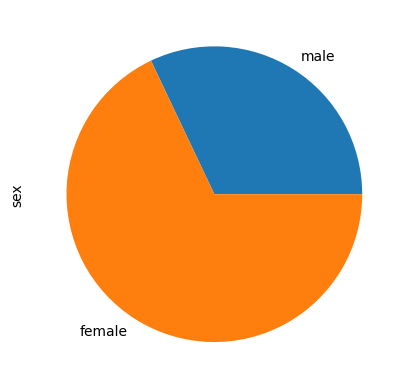

In [108]:
survival_category['sex'].value_counts().sort_values().plot(kind='pie')

In [109]:
#Most survivors were first-class passengers
survival_category['ticket_class'].value_counts()

1    134
3    119
2     87
Name: ticket_class, dtype: int64

<Axes: ylabel='ticket_class'>

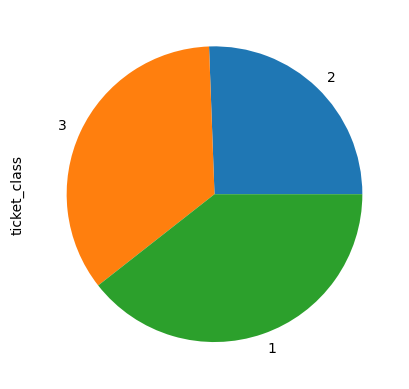

In [110]:
survival_category['ticket_class'].value_counts().sort_values().plot(kind='pie')

In [111]:
#Most survivors embarked from Southampton
survival_category['embarkation_port'].value_counts()

S    217
C     93
Q     30
Name: embarkation_port, dtype: int64

<Axes: ylabel='embarkation_port'>

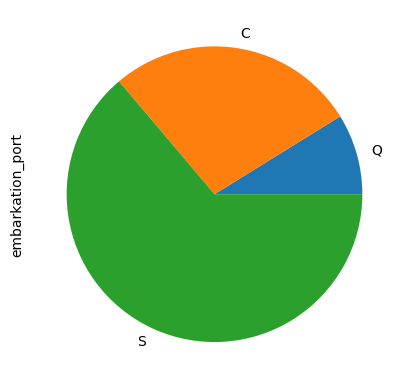

In [112]:
survival_category['embarkation_port'].value_counts().sort_values().plot(kind='pie')

In [113]:
#Lone travelers make up the majority out of all family numbers
survival_category['family'].value_counts()

0    161
1     89
2     59
3     21
6      4
5      3
4      3
Name: family, dtype: int64

<Axes: >

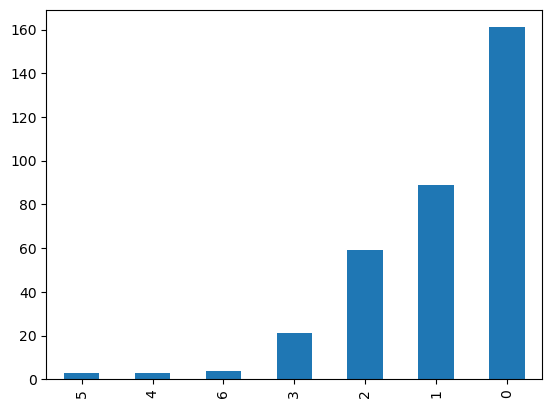

In [114]:
survival_category['family'].value_counts().sort_values().plot(kind='bar')

In [115]:
#Most of the survivors travelled with some number of family members
survival_category['lone_passenger'].value_counts()

False    179
True     161
Name: lone_passenger, dtype: int64

<Axes: ylabel='lone_passenger'>

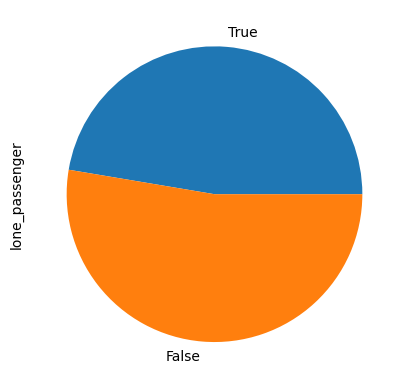

In [116]:
survival_category['lone_passenger'].value_counts().sort_values().plot(kind='pie')